## Problem 1

In [ ]:
import numpy as np

def train_mlp(X, y, hidden_neurons=10, learning_rate=0.1, epochs=1000):
    """
    - X: (n_samples, n_features).
    - y: containing 0s and 1s.
    - hidden_neurons: Number of neurons in the hidden layer.
    - learning_rate: Learning rate for weight updates.
    - epochs: Number of iterations over the training dataset.

    Returns trained weights and biases for hidden and output layers.
    """

    if len(y.shape)==1:
      y=y[:,None]
    n_samples, n_features = X.shape

    # Initialize weights and biases
    w_hidden = np.random.normal(loc=0, scale=0.1, size=(n_features, hidden_neurons))
    b_hidden = np.zeros((1, hidden_neurons))
    w_output = np.random.normal(loc=0, scale=0.1, size=(hidden_neurons, 1))
    b_output = 0.0

    # Activation functions
    sigmoid = lambda z: 1 / (1 + np.exp(-z))

    # Training loop
    for epoch in range(epochs):
        # Forward pass
        z_hidden = X @ w_hidden + b_hidden
        a_hidden = np.tanh(z_hidden)
        z_output = a_hidden @ w_output + b_output
        y_pred = sigmoid(z_output)

        # Compute binary cross-entropy loss
        epsilon = 1e-20  # Avoid zero in log
        loss = -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))

        # Backpropagation
        error_output = y_pred - y
        grad_w_output = a_hidden.T@error_output/n_samples
        grad_b_output = np.mean(error_output)

        error_hidden = error_output@w_output.T * (1-np.tanh(z_hidden)**2)
        grad_w_hidden = X.T@error_hidden / n_samples
        grad_b_hidden = np.mean(error_hidden, axis=0)

        # Update weights and biases
        w_output -= learning_rate * grad_w_output
        b_output -= learning_rate * grad_b_output
        w_hidden -= learning_rate * grad_w_hidden
        b_hidden -= learning_rate * grad_b_hidden

        # Optional: Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss:.4f}')

    return w_hidden, b_hidden, w_output, b_output


def test_mlp(X, w_hidden, b_hidden, w_output, b_output):
    """
    - X: (n_samples, n_features).
    - w_hidden: Trained weights for the hidden layer.
    - b_hidden: Trained biases for the hidden layer.
    - w_output: Trained weights for the output layer.
    - b_output: Trained bias for the output layer.

    Returns predicted labels y_pred
    """
    # Activation function
    sigmoid = lambda z: 1 / (1 + np.exp(-z))

    # Forward pass
    z_hidden = X @ w_hidden + b_hidden
    a_hidden = np.tanh(z_hidden)
    z_output = a_hidden @ w_output + b_output
    y_prob = sigmoid(z_output)

    # Convert probabilities to binary outputs (0 or 1) using a threshold of 0.5
    y_pred = np.where(y_prob >= 0.5, 1, 0)

    return y_pred, a_hidden

In [ ]:
X=np.load("concentric_x.npy")
y=np.load("concentric_y.npy")

In [ ]:
w_hidden, b_hidden, w_output, b_output=train_mlp(X, y, hidden_neurons=3, learning_rate=1., epochs=2000)


Epoch 0, Loss: 0.6932
Epoch 100, Loss: 0.6931
Epoch 200, Loss: 0.6924
Epoch 300, Loss: 0.5318
Epoch 400, Loss: 0.1774
Epoch 500, Loss: 0.0872
Epoch 600, Loss: 0.0576
Epoch 700, Loss: 0.0431
Epoch 800, Loss: 0.0344
Epoch 900, Loss: 0.0287
Epoch 1000, Loss: 0.0247
Epoch 1100, Loss: 0.0216
Epoch 1200, Loss: 0.0193
Epoch 1300, Loss: 0.0174
Epoch 1400, Loss: 0.0158
Epoch 1500, Loss: 0.0145
Epoch 1600, Loss: 0.0134
Epoch 1700, Loss: 0.0125
Epoch 1800, Loss: 0.0117
Epoch 1900, Loss: 0.0110


In [ ]:
y_pred, a_hidden = test_mlp(X, w_hidden, b_hidden, w_output, b_output)
print(y_pred.T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1]]


In [ ]:
!pip install -U kaleido
import plotly.express as px

fig = px.scatter_3d(x=a_hidden[:, 0], y=a_hidden[:, 1], z=a_hidden[:, 2], color=y)
fig.update_layout(
       scene=dict(
           xaxis_title='Hidden 1',
           yaxis_title='Hidden 2',
           zaxis_title='Hidden 3'
       ),
       title='Interactive 3D Scatter Plot of Hidden Layer Activations'
   )
fig.show()

In [ ]:
fig.write_image("NN.pdf")

## Problem 2

In [ ]:
import librosa

In [ ]:
import numpy as np

def train_mlp(X, y, hidden_neurons=10, learning_rate=0.1, epochs=1000):
    """
    - X: (n_samples, n_features).
    - y: (n_samples, n_output); containing 0s and 1s.
    - hidden_neurons: Number of neurons in the hidden layer.
    - learning_rate: Learning rate for weight updates.
    - epochs: Number of iterations over the training dataset.

    Returns trained weights and biases for hidden and output layers.
    """

    if len(y.shape)==1:
      y=y[:,None]
    n_samples, n_features = X.shape
    n_samples, n_output = y.shape

    # Initialize weights and biases
    w_hidden = np.random.normal(loc=0, scale=0.1, size=(n_features, hidden_neurons))
    b_hidden = np.zeros((1, hidden_neurons))
    w_output = np.random.normal(loc=0, scale=0.1, size=(hidden_neurons, n_output))
    b_output = 0.0

    # Activation functions
    sigmoid = lambda z: 1 / (1 + np.exp(-z))

    # Training loop
    for epoch in range(epochs):
        # Forward pass
        z_hidden = X @ w_hidden + b_hidden
        a_hidden = np.tanh(z_hidden)
        z_output = a_hidden @ w_output + b_output
        y_pred = sigmoid(z_output)

        # Compute binary cross-entropy loss
        epsilon = 1e-20  # Avoid zero in log
        loss = -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))

        # Backpropagation
        error_output = y_pred - y

        grad_w_output = a_hidden.T@error_output/n_samples
        grad_b_output = np.mean(error_output)

        error_hidden = error_output@w_output.T * (1-np.tanh(z_hidden)**2)

        grad_w_hidden = X.T@error_hidden / n_samples
        grad_b_hidden = np.mean(error_hidden, axis=0)

        # Update weights and biases
        w_output -= learning_rate * grad_w_output
        b_output -= learning_rate * grad_b_output
        w_hidden -= learning_rate * grad_w_hidden
        b_hidden -= learning_rate * grad_b_hidden

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss:.4f}')

    return w_hidden, b_hidden, w_output, b_output


def test_mlp(X, w_hidden, b_hidden, w_output, b_output):
    """
    - X: (n_samples, n_features).
    - w_hidden: Trained weights for the hidden layer.
    - b_hidden: Trained biases for the hidden layer.
    - w_output: Trained weights for the output layer.
    - b_output: Trained bias for the output layer.

    Returns predicted labels y_pred
    """
    # Activation functions
    # relu = lambda z: np.maximum(0, z)
    sigmoid = lambda z: 1 / (1 + np.exp(-z))

    # Forward pass
    z_hidden = X @ w_hidden + b_hidden
    a_hidden = np.tanh(z_hidden)
    z_output = a_hidden @ w_output + b_output
    y_prob = sigmoid(z_output)

    # Convert probabilities to binary outputs (0 or 1) using a threshold of 0.5
    # y_pred = np.float64(np.where(y_prob >= 0.5, 1, 0))

    return y_prob, a_hidden

In [ ]:
trs, sr=librosa.load("trs.wav", sr=None)
trn, sr=librosa.load("trn.wav", sr=None)
trx=trs+trn
trX=librosa.core.stft(trx, n_fft=1024, hop_length=512)
trS=librosa.core.stft(trs, n_fft=1024, hop_length=512)
trN=librosa.core.stft(trn, n_fft=1024, hop_length=512)
trM=np.float64(np.where(np.abs(trS)>np.abs(trN), 1, 0))


In [ ]:
w_hidden, b_hidden, w_output, b_output=train_mlp(np.abs(trX).T, trM.T, hidden_neurons=100, learning_rate=.1, epochs=500)

Epoch 0, Loss: 0.7356
Epoch 10, Loss: 0.5268
Epoch 20, Loss: 0.5024
Epoch 30, Loss: 0.5049
Epoch 40, Loss: 0.4812
Epoch 50, Loss: 0.4973
Epoch 60, Loss: 0.4740
Epoch 70, Loss: 0.4678
Epoch 80, Loss: 0.4648
Epoch 90, Loss: 0.4493
Epoch 100, Loss: 0.4469
Epoch 110, Loss: 0.4291
Epoch 120, Loss: 0.4262
Epoch 130, Loss: 0.4362
Epoch 140, Loss: 0.4356
Epoch 150, Loss: 0.4137
Epoch 160, Loss: 0.4127
Epoch 170, Loss: 0.4220
Epoch 180, Loss: 0.4168
Epoch 190, Loss: 0.4065
Epoch 200, Loss: 0.4090
Epoch 210, Loss: 0.3895
Epoch 220, Loss: 0.3916
Epoch 230, Loss: 0.3903
Epoch 240, Loss: 0.3875
Epoch 250, Loss: 0.3959
Epoch 260, Loss: 0.3740
Epoch 270, Loss: 0.3783
Epoch 280, Loss: 0.3864
Epoch 290, Loss: 0.3756
Epoch 300, Loss: 0.3681
Epoch 310, Loss: 0.3741
Epoch 320, Loss: 0.3776
Epoch 330, Loss: 0.3674
Epoch 340, Loss: 0.3607
Epoch 350, Loss: 0.3704
Epoch 360, Loss: 0.3730
Epoch 370, Loss: 0.3636
Epoch 380, Loss: 0.3540
Epoch 390, Loss: 0.3696
Epoch 400, Loss: 0.3504
Epoch 410, Loss: 0.3428
Epo

In [ ]:
y_pred, _ = test_mlp(np.abs(trX).T, w_hidden, b_hidden, w_output, b_output)
print(y_pred)

[[5.89758060e-01 5.49206984e-01 3.28632406e-01 ... 5.12517684e-04
  1.63305809e-04 1.55440873e-03]
 [3.71291621e-01 4.04608508e-01 3.37118669e-01 ... 3.42121464e-03
  7.66811005e-04 4.00104034e-03]
 [4.95585290e-01 7.72769237e-01 6.48764324e-01 ... 2.09532514e-02
  1.67053945e-02 3.48011084e-02]
 ...
 [8.85397672e-01 9.15272990e-01 9.49625276e-01 ... 5.92898794e-03
  5.40429600e-03 5.97313470e-03]
 [9.47132335e-01 9.36831842e-01 9.17112571e-01 ... 2.07875895e-02
  3.01596746e-02 3.31178644e-02]
 [9.69307593e-01 9.80456080e-01 9.39433698e-01 ... 1.26665456e-01
  1.22880980e-01 1.48464769e-01]]


In [ ]:
trs_recons=librosa.core.istft(trX*y_pred.T, hop_length=512)

In [ ]:
import IPython.display as ipd
ipd.Audio(trs_recons, rate=sr)

In [ ]:
tex, sr=librosa.load("tex.wav", sr=None)
tes, sr=librosa.load("tes.wav", sr=None)
teX=librosa.core.stft(tex, n_fft=1024, hop_length=512)
y_pred_test, _ = test_mlp(np.abs(teX).T, w_hidden, b_hidden, w_output, b_output)
tes_recons=librosa.core.istft(teX*y_pred_test.T, hop_length=512)

In [ ]:
ipd.Audio(tes_recons, rate=sr)

In [ ]:
min_length=np.minimum(len(tes), len(tes_recons))
print(min_length)

50688


In [ ]:
print(10*np.log10(np.mean(np.square(tes[:min_length]))/ np.mean(np.square(tes[:min_length]-tes_recons[:min_length]))))
print(10*np.log10(np.mean(np.square(tes[:min_length]))/ np.mean(np.square(tex[:min_length]-tes[:min_length]))))

13.757132646001642
7.187410593032837


## Problem 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


trX=np.load('trX.npy')
trY=np.load('trY.npy')

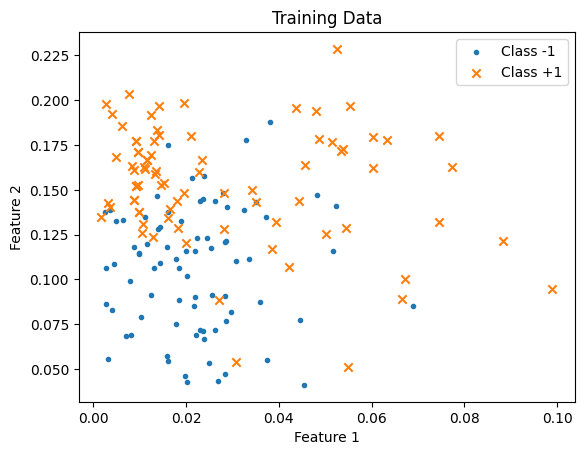

In [ ]:
# Plot training data
plt.figure()
plt.scatter(trX[0, :80], trX[1, :80], marker='.', label='Class -1')
plt.scatter(trX[0, 80:], trX[1, 80:], marker='x', label='Class +1')
plt.legend()
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:

# Define functions
def bp(X, w, trY):
    """
    Updated bp function implementing gradient descent with tanh activation.
    """
    n_features, n_samples = X.shape
    a = (np.random.rand( n_features + 1, 1 ) - 0.5) * 0.1  # Initialize parameters
    # print(a.shape)
    maxIter = 200
    lr = 0.1
    ONES = np.ones((1, n_samples))
    X_augmented = np.vstack((X, ONES))  # Shape: (n_features + 1, n_samples)
    updateL2 = np.zeros(maxIter)

    for ii in range(maxIter):
        z = a.T @ X_augmented  # (n_samples,)
        yh = np.tanh(z)  # (n_samples,)
        tanh_derivative = 1 - yh ** 2  # Derivative of tanh
        delta = w * (yh - trY) * tanh_derivative  # (n_samples,)

        update = np.dot(X_augmented, delta.T)  # (n_features + 1,)
        a = a - lr * update
        updateL2[ii] = np.sqrt(np.sum(update ** 2))
    return a[:, 0]
# Updated ff function
def ff(X, a):
    """
    Computes the output of the weak learner with tanh activation.
    """
    n_samples = X.shape[1]
    ONES = np.ones((1, n_samples))
    X_augmented = np.vstack((X, ONES))  # Shape: (3, n_samples)
    z = np.dot(a, X_augmented)  # z is shape (n_samples,)
    yh = np.tanh(z)
    return yh


# Initialize variables
nBasis = 1000
a = np.zeros((3, nBasis))
b = np.zeros(nBasis)
w = np.zeros((nBasis + 1, trX.shape[1]))
w[0, :] = np.ones(trX.shape[1]) / trX.shape[1]

# AdaBoost training loop
for ii in range(nBasis):
    # Train weak learner

    a[:, ii] = bp(trX, w[ii, :], trY)
    yh = np.sign(ff(trX, a[:, ii]))
    # Compute error and weight
    correct = yh * trY > 0
    incorrect = yh * trY < 0
    b[ii] = 0.5 * np.log(np.sum(w[ii, :] * correct) / (np.sum(w[ii, :] * incorrect) + np.finfo(float).eps))
    # Update weights
    w[ii + 1, :] = w[ii, :] * np.exp(-b[ii] * trY * yh)
    w[ii + 1, :] = w[ii + 1, :] / np.sum(w[ii + 1, :])  # Normalize weights





Training accuracy: 0.775


<ipython-input-54-30f06c3bcd7c>:43: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(trX[0, 80:], trX[1, 80:], s=w_plot[80:], c='red', edgecolors='k', marker='x', label='Class +1')


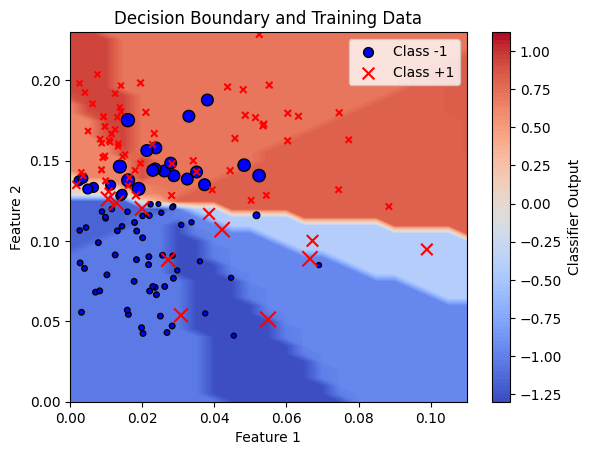

In [ ]:

nBasis_inf=10
# Training predictions
trYh = np.zeros((nBasis_inf, trX.shape[1]))
for ii in range(nBasis_inf):
    trYh[ii, :] = b[ii] * np.sign(ff(trX, a[:, ii]))

final_trYh = np.sign(np.sum(trYh, axis=0))
training_accuracy = np.sum(final_trYh * trY > 0) / trY.size
print("Training accuracy:", training_accuracy)


# Generate grid for plotting decision boundary
ci_range = np.arange(0, 1.0 + 0.005, 0.005)
ri_range = np.arange(0, 1.0 + 0.005, 0.005)
ci, ri = np.meshgrid(ci_range, ri_range)
grid_points = np.vstack((ci.ravel(), ri.ravel()))

# Compute classifier outputs over the grid
vYh = np.zeros((nBasis_inf, grid_points.shape[1]))
for ii in range(nBasis_inf):
    vYh[ii, :] = b[ii] * np.sign(ff(grid_points, a[:, ii]))
Z = np.sum(vYh, axis=0)
Z = Z.reshape(ci.shape)

# Plot decision boundary and training data
plt.figure()
plt.contourf(ci, ri, Z, levels=100, cmap='coolwarm', linestyles='none')
plt.colorbar(label='Classifier Output')

# Adjust weights for plotting
w_plot = w[nBasis_inf-1, :] * 5000
w_plot = np.clip(w_plot, 5, 1000)  # Clip weights for visualization

plt.scatter(trX[0, :80], trX[1, :80], s=w_plot[:80], c='blue', edgecolors='k', marker='o', label='Class -1')
plt.scatter(trX[0, 80:], trX[1, 80:], s=w_plot[80:], c='red', edgecolors='k', marker='x', label='Class +1')
plt.legend()
plt.title('Decision Boundary and Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(0.0, .11)
plt.ylim(0.0, 0.23)
plt.show()

Training accuracy: 0.90625


<ipython-input-55-8dfee221ccc9>:43: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(trX[0, 80:], trX[1, 80:], s=w_plot[80:], c='red', edgecolors='k', marker='x', label='Class +1')


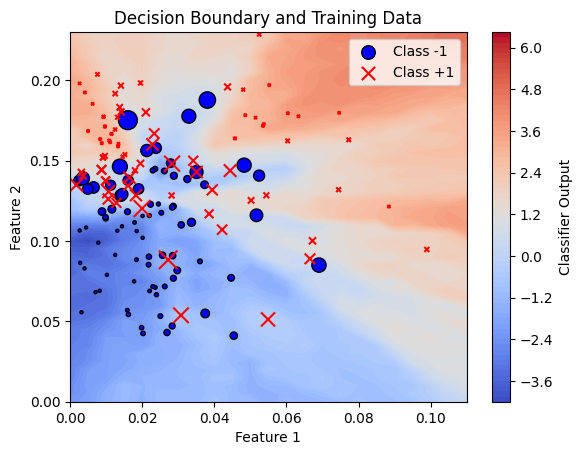

In [ ]:

nBasis_inf=1000
# Training predictions
trYh = np.zeros((nBasis_inf, trX.shape[1]))
for ii in range(nBasis_inf):
    trYh[ii, :] = b[ii] * np.sign(ff(trX, a[:, ii]))

final_trYh = np.sign(np.sum(trYh, axis=0))
training_accuracy = np.sum(final_trYh * trY > 0) / trY.size
print("Training accuracy:", training_accuracy)

# Generate grid for plotting decision boundary
ci_range = np.arange(0, 1.0 + 0.005, 0.005)
ri_range = np.arange(0, 1.0 + 0.005, 0.005)
ci, ri = np.meshgrid(ci_range, ri_range)
grid_points = np.vstack((ci.ravel(), ri.ravel()))

# Compute classifier outputs over the grid
vYh = np.zeros((nBasis_inf, grid_points.shape[1]))
for ii in range(nBasis_inf):
    vYh[ii, :] = b[ii] * np.sign(ff(grid_points, a[:, ii]))
Z = np.sum(vYh, axis=0)
Z = Z.reshape(ci.shape)

# Plot decision boundary and training data
plt.figure()
plt.contourf(ci, ri, Z, levels=100, cmap='coolwarm', linestyles='none')
plt.colorbar(label='Classifier Output')

# Adjust weights for plotting
w_plot = w[nBasis_inf-1, :] * 5000
w_plot = np.clip(w_plot, 5, 1000)  # Clip weights for visualization

plt.scatter(trX[0, :80], trX[1, :80], s=w_plot[:80], c='blue', edgecolors='k', marker='o', label='Class -1')
plt.scatter(trX[0, 80:], trX[1, 80:], s=w_plot[80:], c='red', edgecolors='k', marker='x', label='Class +1')
plt.legend()
plt.title('Decision Boundary and Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(0.0, .11)
plt.ylim(0.0, 0.23)
plt.show()

## Problem 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plsi_train(Xtr, K=50, n_iter=50):
    """
    Probabilistic Latent Semantic Indexing (PLSI) training.

    Parameters:
    - Xtr: numpy array of shape (F, T), training data matrix
            where F is the number of features (e.g., words) and T is the number of documents.
    - K: int, number of topics (latent factors).
    - n_iter: int, number of iterations for the EM algorithm.

    Returns:
    - W: numpy array of shape (F, K), word-topic distributions.
    - Htr: numpy array of shape (K, T), topic-document distributions.
    """
    F, T = Xtr.shape
    eps = np.finfo(float).eps  # Small constant to prevent division by zero

    # Initialize W and Htr with random values and normalize
    W = np.random.rand(F, K)
    W = W / (np.sum(W, axis=0, keepdims=True) + eps)  # Normalize columns to sum to 1

    Htr = np.random.rand(K, T)
    Htr = Htr / (np.sum(Htr, axis=0, keepdims=True) + eps)  # Normalize columns to sum to 1

    # EM algorithm
    for ii in range(n_iter):
        # E-step: Compute the expected counts
        WH = np.dot(W, Htr) + eps  # Avoid division by zero
        X_div_WH = Xtr / WH

        # M-step: Update W
        W_update = np.dot(X_div_WH, Htr.T)
        W *= W_update
        W = W/ (np.sum(W, axis=0, keepdims=True) + eps)  # Normalize columns to sum to 1

        # M-step: Update Htr
        WH = np.dot(W, Htr) + eps  # Recompute WH with updated W
        X_div_WH = Xtr / WH
        Htr_update = np.dot(W.T, X_div_WH)
        Htr *= Htr_update
        Htr = Htr / (np.sum(Htr, axis=0, keepdims=True) + eps)  # Normalize columns to sum to 1

    return W, Htr

def plsi_project(Xte, W, n_iter=50):
    """
    PLSI testing (projection): Computes the topic-document distributions for new documents.

    Parameters:
    - Xte: numpy array of shape (F, T_test), test data matrix.
    - W: numpy array of shape (F, K), word-topic distributions learned from training.
    - n_iter: int, number of iterations for the projection algorithm.

    Returns:
    - Hte: numpy array of shape (K, T_test), topic-document distributions for test data.
    """
    F, T_test = Xte.shape
    K = W.shape[1]
    eps = np.finfo(float).eps  # Small constant to prevent division by zero

    # Initialize Hte with random values and normalize
    Hte = np.random.rand(K, T_test)
    Hte = Hte / (np.sum(Hte, axis=0, keepdims=True) + eps)  # Normalize columns to sum to 1

    # Iterative update for Hte
    for ii in range(n_iter):
        WH = np.dot(W, Hte) + eps  # Avoid division by zero
        X_div_WH = Xte / WH

        # Update Hte
        Hte_update = np.dot(W.T, X_div_WH)
        Hte *= Hte_update
        Hte = Hte / (np.sum(Hte, axis=0, keepdims=True) + eps)  # Normalize columns to sum to 1

    return Hte

In [ ]:
X=np.load('faces.npy')


In [ ]:
K=6
W, H=plsi_train(X, K=K, n_iter=1000)


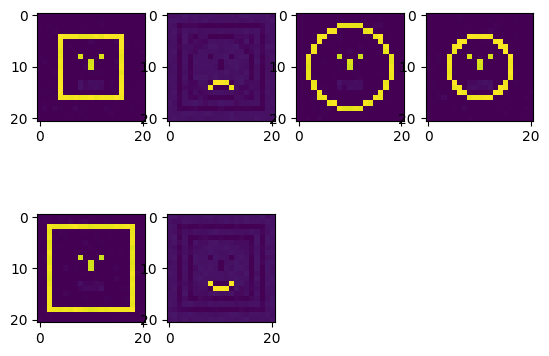

In [ ]:
plt.figure()
for k in range(K):
  plt.subplot(2,4,k+1)
  plt.imshow(W[:,k].reshape(21,21))